### 생선의 무게와 크기로 생선 분류
- 데이터셋: fish.cvs
- feature/input_data: Length
- target/class/output: Weight
- learning method: superviserd learing, regression
- learning algorithm: liner-regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = '../data/fish.csv'
fish_df = pd.read_csv(path)
fish_df.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [3]:
fish_df['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [4]:
perch_df = fish_df.loc[fish_df['Species']=='Perch',:]

In [5]:
perch_df.head()

,Species,Weight,Length,Diagonal,Height,Width
72,Perch,5.9,8.4,8.8,2.1120,1.4080
73,Perch,32.0,13.7,14.7,3.5280,1.9992
74,Perch,40.0,15.0,16.0,3.8240,2.4320
75,Perch,51.5,16.2,17.2,4.5924,2.6316
76,Perch,70.0,17.4,18.5,4.5880,2.9415


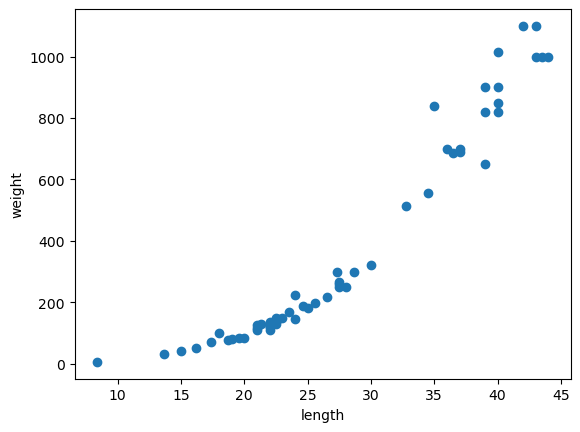

In [6]:
plt.scatter(perch_df['Length'], perch_df['Weight'])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [7]:
# feature & label
feature = perch_df[['Length']]
label = perch_df['Weight']

print(f"feaure shape: {feature.shape}, {feature.ndim}D")
print(f"label shape: {label.shape}, {label.ndim}D")

feaure shape: (56, 1), 2D
label shape: (56,), 1D


In [8]:
# train & test split
from sklearn.model_selection import train_test_split

In [9]:
# train : teat = 75 : 25
# random_state = 30

X_train, X_test, y_train, y_test = train_test_split(feature, label, random_state=30)

print(f"X_train: {X_train.shape}, {X_train.ndim}D")
print(f"y_train: {y_train.shape}, {y_train.ndim}D")
print()
print(f"X_test: {X_test.shape}, {X_test.ndim}D")
print(f"y_test: {y_test.shape}, {y_test.ndim}D")


X_train: (42, 1), 2D
y_train: (42,), 1D

X_test: (14, 1), 2D
y_test: (14,), 1D


In [10]:
print(f"{len(X_train)/len(feature)*100:.2f}, {len(X_test)/len(feature)*100:.2f}")

75.00, 25.00


- non scaling

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
# create model instance
model = LinearRegression()

In [13]:
# model learning
model.fit(X_train, y_train)

LinearRegression()

In [14]:
model.coef_, model.rank_, model.singular_, model.intercept_, model.n_features_in_

(array([35.80482869]), 1, array([61.35959583]), -603.6175641054829, 1)

In [15]:
non_gradient = model.coef_
non_bais = model.intercept_

In [16]:
# mae, mse, rmse, r2
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [17]:
prediction = model.predict(X_test)

In [18]:
non_mae = mean_absolute_error(y_test, prediction)
non_mse = mean_squared_error(y_test, prediction)
non_rmse = mean_squared_error(y_test, prediction, squared=False)
non_r_2 = r2_score(y_test, prediction)

print(f"mae: {non_mae}")
print(f"mse: {non_mse}")
print(f"rmse: {non_rmse}")
print(f"R2 score: {non_r_2}")

mae: 87.64796541724262
mse: 10086.005835629912
rmse: 100.42910850759311
R2 score: 0.8992492870093507


- MinMaxScaling

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
# scaler instance
mm_scaler = MinMaxScaler()

In [21]:
mm_scaler.fit(X_train, y_train)

MinMaxScaler()

In [22]:
mm_scaler.min_, mm_scaler.data_min_, mm_scaler.scale_, mm_scaler.data_max_, mm_scaler.data_range_, mm_scaler.feature_names_in_, mm_scaler.n_features_in_, mm_scaler.n_features_in_, mm_scaler.n_samples_seen_

(array([-0.23595506]),
 array([8.4]),
 array([0.02808989]),
 array([44.]),
 array([35.6]),
 array(['Length'], dtype=object),
 1,
 1,
 42)

In [23]:
# transform
scaled_X_train = mm_scaler.transform(X_train)
scaled_X_test = mm_scaler.transform(X_test)
re_y_train = y_train.reset_index(drop=True)
re_y_test = y_test.reset_index(drop=True)

In [24]:
model.fit(scaled_X_train, re_y_train)

LinearRegression()

In [25]:
model.coef_, model.rank_, model.singular_, model.intercept_, model.n_features_in_

(array([1274.6519012]), 1, array([1.72358415]), -302.85700314930733, 1)

In [26]:
mm_gradient = model.coef_
mm_bais = model.intercept_

In [27]:
mm_prediction = model.predict(scaled_X_test)

In [28]:
mm_mae = mean_absolute_error(re_y_test, mm_prediction)
mm_mse = mean_squared_error(re_y_test, mm_prediction)
mm_rmse = mean_squared_error(re_y_test, mm_prediction, squared=False)
mm_r_2 = r2_score(re_y_test, mm_prediction)

print(f"mae: {mm_mae}")
print(f"mse: {mm_mse}")
print(f"rmse: {mm_rmse}")
print(f"R2 score: {mm_r_2}")

mae: 87.64796541724259
mse: 10086.0058356299
rmse: 100.42910850759306
R2 score: 0.8992492870093509


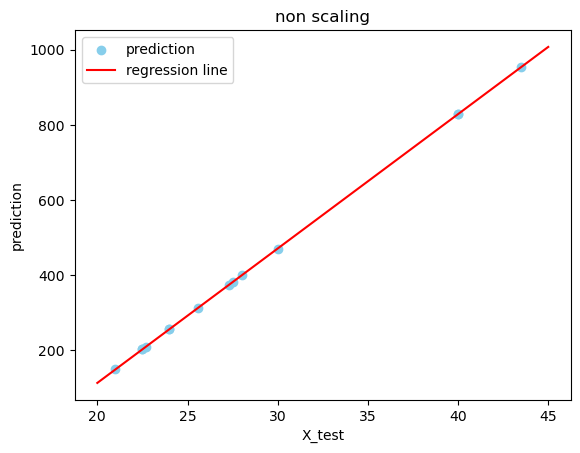

In [41]:
# non scaling
plt.scatter(X_test, prediction, color='skyblue', label='prediction')
y = [non_gradient * 20 + non_bais, non_gradient * 45 + non_bais]
plt.plot([20,45], y, color='red', label='regression line')

plt.title('non scaling')
plt.xlabel('X_test')
plt.ylabel('prediction')
plt.legend()
plt.show()

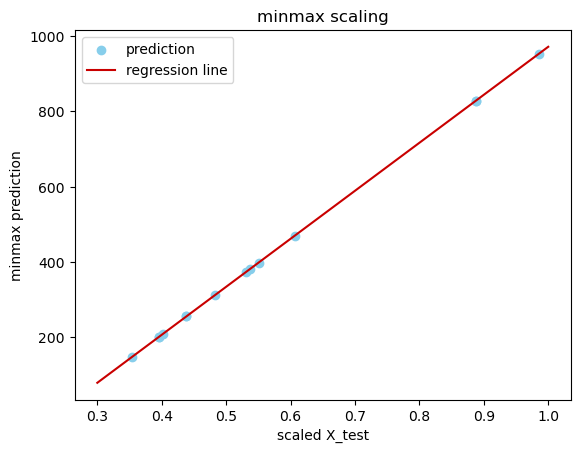

In [62]:
# minmax scaling
plt.scatter(scaled_X_test, mm_prediction, color='skyblue', label='prediction')
y = [mm_gradient * 0.3 + mm_bais, mm_gradient * 1 + mm_bais]
plt.plot([0.3, 1], y, color='#C90000', label='regression line')

plt.title('minmax scaling')
plt.xlabel('scaled X_test')
plt.ylabel('minmax prediction')
plt.legend()
plt.show()

In [48]:
print(mm_scaler.transform(perch_df[['Length']]).min(), mm_scaler.transform(perch_df[['Length']]).max())

0.0 0.9999999999999999


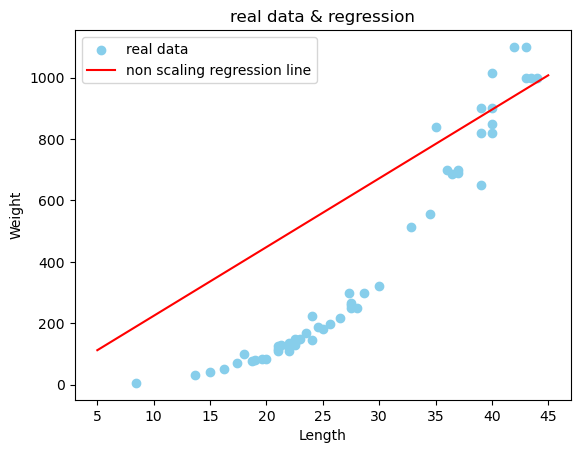

In [52]:
# perch_df
plt.scatter(perch_df['Length'], perch_df['Weight'], color='skyblue', label='real data')

non_y = [non_gradient * 5 + non_bais, non_gradient * 45 + non_bais]
# mm_y = [mm_gradient * 0 + mm_bais, mm_gradient * 1 + mm_bais]

plt.plot([5, 45], y, color='red', label='non scaling regression line')
# plt.plot([0, 1], y, color='#C90000', label='minmax scaling regression line')

plt.title('real data & regression')
plt.xlabel('Length')
plt.ylabel('Weight')
plt.legend()
plt.show()

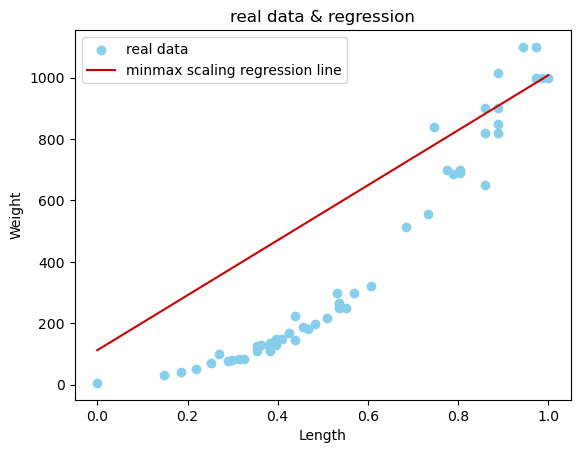

In [53]:
# perch_df
plt.scatter(mm_scaler.transform(perch_df[['Length']]), perch_df['Weight'], color='skyblue', label='real data')

# non_y = [non_gradient * 10 + non_bais, non_gradient * 45 + non_bais]
mm_y = [mm_gradient * 0 + mm_bais, mm_gradient * 1 + mm_bais]

# plt.plot([10, 45], y, color='red', label='non scaling regression line')
plt.plot([0, 1], y, color='#C90000', label='minmax scaling regression line')

plt.title('real data & regression')
plt.xlabel('Length')
plt.ylabel('Weight')
plt.legend()
plt.show()

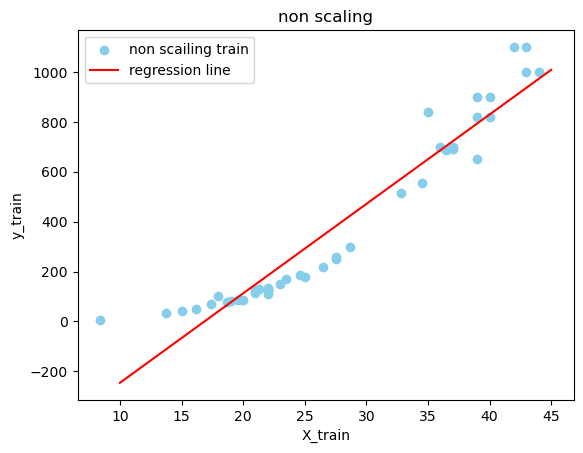

In [58]:
# non scaling
plt.scatter(X_train, y_train, color='skyblue', label='non scailing train')
y = [non_gradient * 10 + non_bais, non_gradient * 45 + non_bais]
plt.plot([10,45], y, color='red', label='regression line')

plt.title('non scaling')
plt.xlabel('X_train')
plt.ylabel('y_train')
plt.legend()
plt.show()

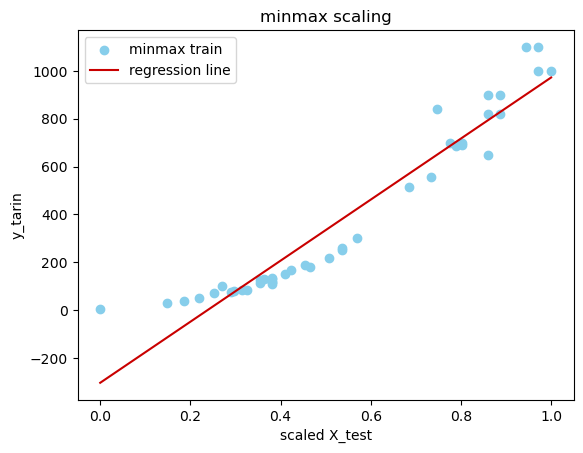

In [63]:
# minmax scaling
plt.scatter(scaled_X_train, re_y_train, color='skyblue', label='minmax train')
y = [mm_gradient * 0 + mm_bais, mm_gradient * 1 + mm_bais]
plt.plot([0, 1], y, color='#C90000', label='regression line')

plt.title('minmax scaling')
plt.xlabel('scaled X_test')
plt.ylabel('y_tarin')
plt.legend()
plt.show()

- test에서는 잘 나왔느데 real은 영 아니네
- 모델 r2는 각각 89.92 % 나왔는데
- train도 영아니네

In [65]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

In [66]:
import numpy as np

Degree 1 coef_: 36.94
Degree 1 MSE: 12498.768194226795

mae: 70.99128317602886
mse: 7330.609529194027
rmse: 85.61897879088507
R2 score: 0.9054689382581748



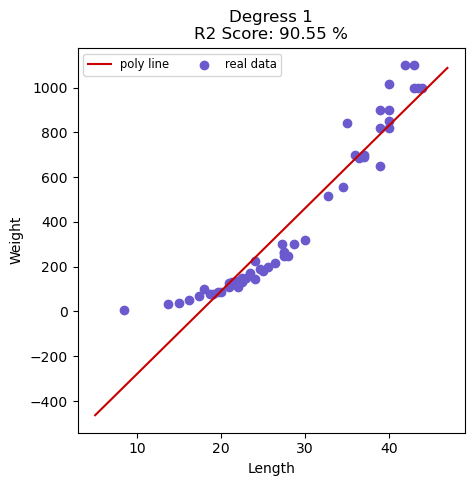

Degree 2 coef_: 1.02
Degree 2 MSE: 3493.1483607690643

mae: 39.12545388473105
mse: 3720.4422828586403
rmse: 60.995428376712304
R2 score: 0.9626798528216677



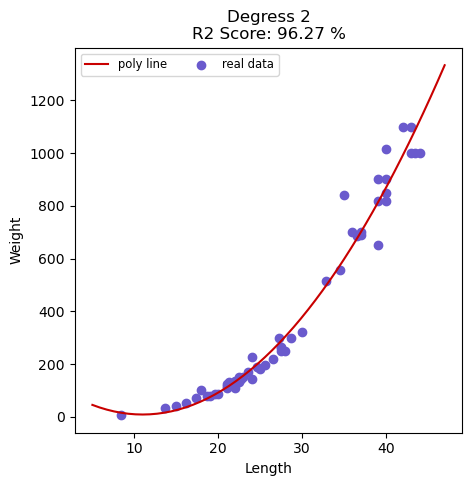

Degree 3 coef_: -0.01
Degree 3 MSE: 3875.967818938939

mae: 37.40673772064623
mse: 4564.403495271434
rmse: 67.5603692653573
R2 score: 0.9476311899627983



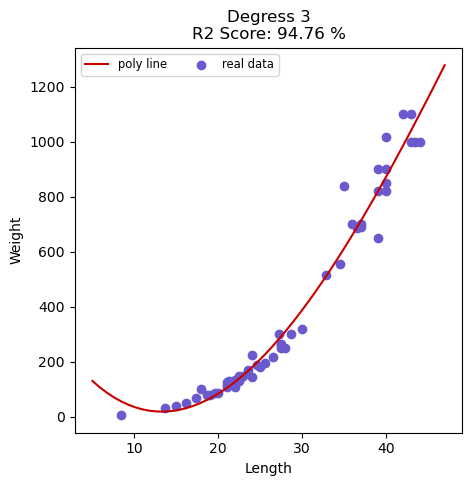

Degree 4 coef_: -0.00
Degree 4 MSE: 3434.5663614569808

mae: 18.49178796782075
mse: 582.0721282611328
rmse: 24.126171023623552
R2 score: 0.9879581639278612



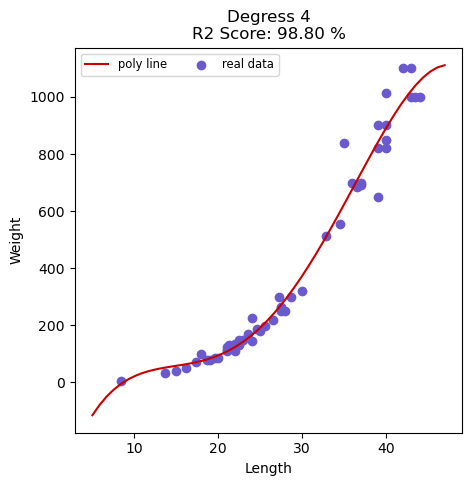

Degree 5 coef_: -0.00
Degree 5 MSE: 6156.9021834420655

mae: 36.25813962551524
mse: 2791.4179186898286
rmse: 52.833870941753155
R2 score: 0.981309885378342



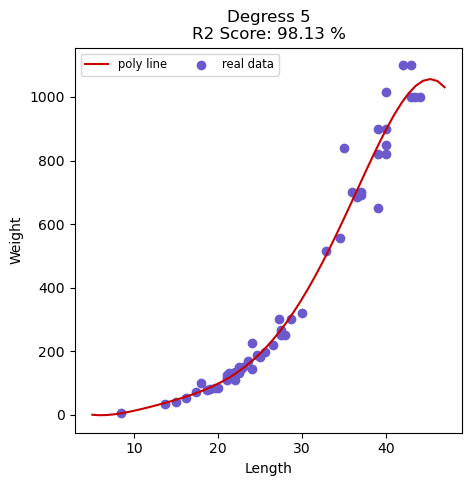

In [120]:
degrees = [x for x in range(1, 6)]


for i in range(len(degrees)):
    # ax = plt.subplot(1, len(degrees), i + 1)
    # plt.setp(ax)
    plt.figure(figsize=(5,5))
    
    # poly instance
    poly = PolynomialFeatures(degree=degrees[i], include_bias=False)
    # model instane already
    pipeline = Pipeline([('polynomial_feature', poly), ('linear_regression', model)])
    pipeline.fit(np.array(perch_df['Length']).reshape(-1,1), perch_df['Weight'].tolist())
    
    feature = perch_df['Length'].to_list()
    label = perch_df['Weight']
    poly_feature = pipeline.named_steps['polynomial_feature'].transform(np.array(feature).reshape(-1,1))
        
    # train : test = 75 : 25
    X_train, X_test, y_train, y_test = train_test_split(poly_feature, label)
    
    # cross validation: k = 10
    scores = cross_val_score(pipeline, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
    gradient = pipeline.named_steps['linear_regression'].coef_
    
    print(f"Degree {degrees[i]} coef_: {gradient[i]:.2f}")
    print(f"Degree {degrees[i]} MSE: {-1*np.mean(scores)}")
    print()
    
    prediction = pipeline.named_steps['linear_regression'].predict(X_test)
    mae = mean_absolute_error(y_test, prediction)
    mse = mean_squared_error(y_test, prediction)
    rmse = mean_squared_error(y_test, prediction, squared=False)
    r_2 = r2_score(y_test, prediction)

    print(f"mae: {mae}")
    print(f"mse: {mse}")
    print(f"rmse: {rmse}")
    print(f"R2 score: {r_2}")
    print()
    
    # print(f"X_test: {X_test.shape}, {X_test.ndim}D")
    # prediction poly
    X_test = np.linspace(5, len(X_train)+5, 50)
    plt.plot(X_test, pipeline.predict(X_test[:,np.newaxis]), color='#C90000', label='poly line')
    plt.scatter(perch_df['Length'], perch_df['Weight'], color='#6A5ACD', label='real data')
    
    plt.title(f'Degress {degrees[i]}\nR2 Score: {r_2*100:.2f} %')
    plt.xlabel('Length')
    plt.ylabel('Weight')
    plt.legend(ncol=2, fontsize='small')
    
    plt.show()

- degree가 2일때 R2 Score 값이 96.27%, degree가 4일때 98.80%
- 왜? ㅁㄹ
- 랜덤 고정을 안해서 그런가...

Degree 1 coef_: 36.94
Degree 1 MSE: 10549.788754697583

mae: 74.51695219701287
mse: 8158.168793700735
rmse: 90.32258185913828
R2 score: 0.9185067571783652



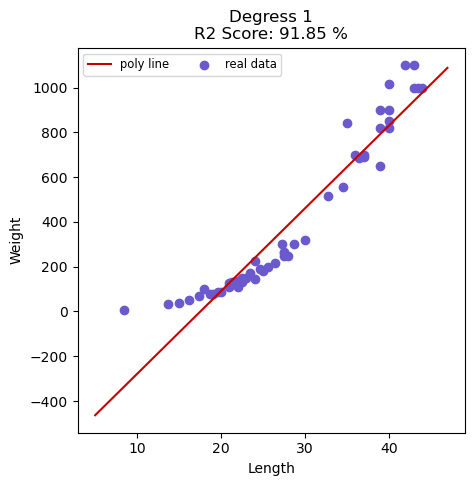

Degree 2 coef_: 1.02
Degree 2 MSE: 3447.1604669864514

mae: 38.714805343295716
mse: 2940.699846459705
rmse: 54.22822001928244
R2 score: 0.9706248825302406



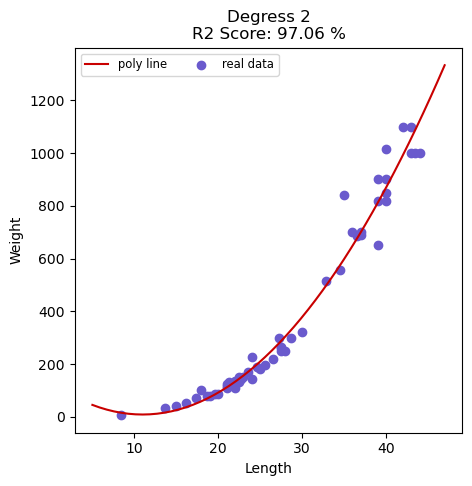

Degree 3 coef_: -0.01
Degree 3 MSE: 21826.320591547505

mae: 38.69049161807629
mse: 2820.5609255091467
rmse: 53.108953346014516
R2 score: 0.971824969278251



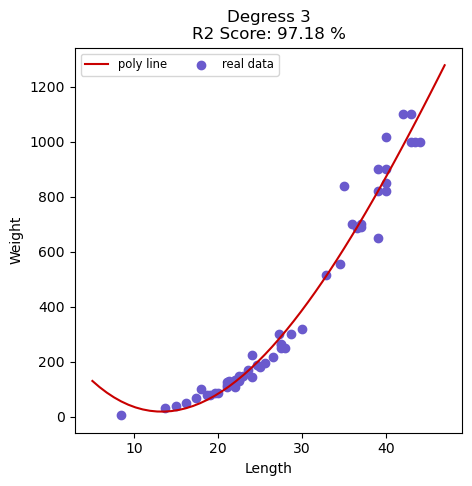

Degree 4 coef_: -0.00
Degree 4 MSE: 9959.714406372796

mae: 32.9779560076027
mse: 2066.3691576021147
rmse: 45.45733337539846
R2 score: 0.9793587105418031



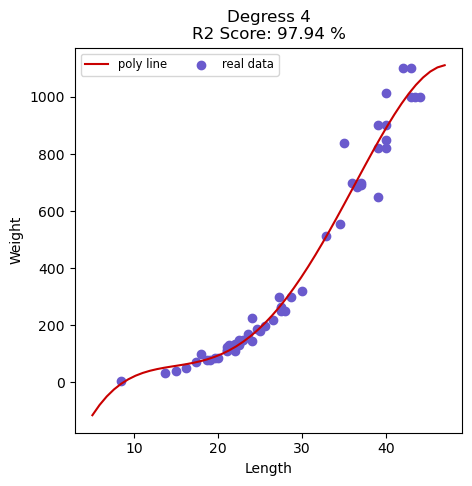

Degree 5 coef_: -0.00
Degree 5 MSE: 252876.52607245796

mae: 31.279484975338676
mse: 1873.481081542018
rmse: 43.283727676137346
R2 score: 0.9812855001458501



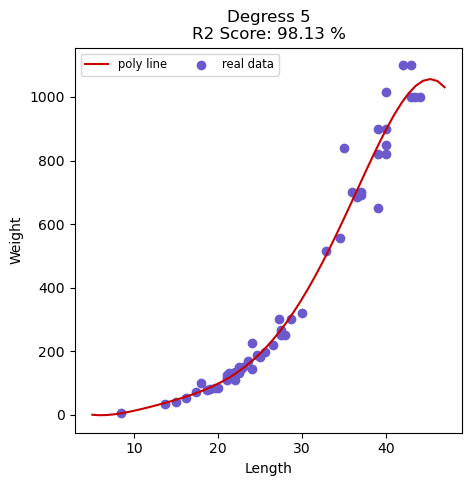

In [121]:
degrees = [x for x in range(1, 6)]


for i in range(len(degrees)):
    # ax = plt.subplot(1, len(degrees), i + 1)
    # plt.setp(ax)
    
    # random_state = 30
    
    plt.figure(figsize=(5,5))
    
    # poly instance
    poly = PolynomialFeatures(degree=degrees[i], include_bias=False)
    # model instane already
    pipeline = Pipeline([('polynomial_feature', poly), ('linear_regression', model)])
    pipeline.fit(np.array(perch_df['Length']).reshape(-1,1), perch_df['Weight'].tolist())
    
    feature = perch_df['Length'].to_list()
    label = perch_df['Weight']
    poly_feature = pipeline.named_steps['polynomial_feature'].transform(np.array(feature).reshape(-1,1))
        
    # train : test = 75 : 25
    X_train, X_test, y_train, y_test = train_test_split(poly_feature, label, random_state=30)
    
    # cross validation: k = 10
    scores = cross_val_score(pipeline, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
    gradient = pipeline.named_steps['linear_regression'].coef_
    
    print(f"Degree {degrees[i]} coef_: {gradient[i]:.2f}")
    print(f"Degree {degrees[i]} MSE: {-1*np.mean(scores)}")
    print()
    
    prediction = pipeline.named_steps['linear_regression'].predict(X_test)
    mae = mean_absolute_error(y_test, prediction)
    mse = mean_squared_error(y_test, prediction)
    rmse = mean_squared_error(y_test, prediction, squared=False)
    r_2 = r2_score(y_test, prediction)

    print(f"mae: {mae}")
    print(f"mse: {mse}")
    print(f"rmse: {rmse}")
    print(f"R2 score: {r_2}")
    print()
    
    # print(f"X_test: {X_test.shape}, {X_test.ndim}D")
    # prediction poly
    X_test = np.linspace(5, len(X_train)+5, 50)
    plt.plot(X_test, pipeline.predict(X_test[:,np.newaxis]), color='#C90000', label='poly line')
    plt.scatter(perch_df['Length'], perch_df['Weight'], color='#6A5ACD', label='real data')
    
    plt.title(f'Degress {degrees[i]}\nR2 Score: {r_2*100:.2f} %')
    plt.xlabel('Length')
    plt.ylabel('Weight')
    plt.legend(ncol=2, fontsize='small')
    
    plt.show()

- random_state = 30 을 주고 datasets을 split 했더니 dgree가 5일때 R2 Score 값이 98.13 % 로 높게 나옴

Degree 2 coef_: -22.42
Degree 2 MSE: 3948.6435837408717

mae: 34.599635029233454
mse: 2286.457854226423
rmse: 47.81692016667764
R2 score: 0.9818160580958272



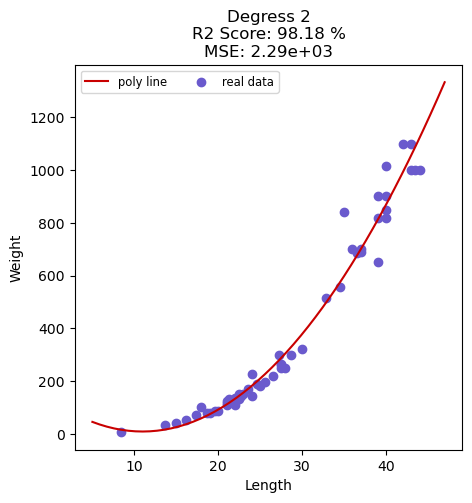

Degree 4 coef_: -8.20
Degree 4 MSE: 17711.83723751342

mae: 25.659645101815784
mse: 1640.3924753441781
rmse: 40.501758916671484
R2 score: 0.9839201217121464



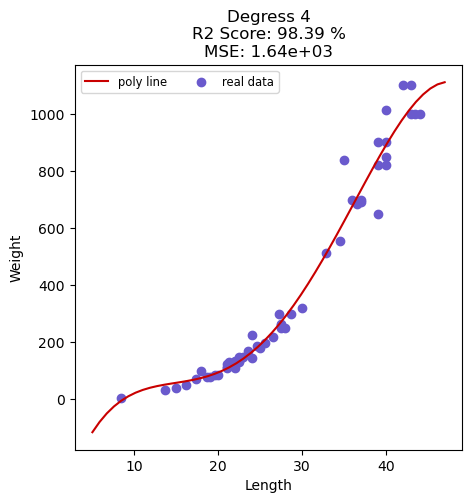

Degree 6 coef_: -1.07
Degree 6 MSE: 2169424.234323718

mae: 34.83188175821549
mse: 4740.075269699728
rmse: 68.84820454957216
R2 score: 0.9659938426333041



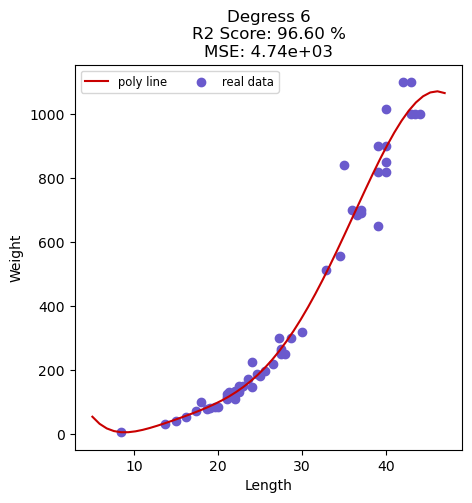

Degree 8 coef_: -1.62
Degree 8 MSE: 8687760167978.338

mae: 58.59717257897449
mse: 7512.635582288355
rmse: 86.67546124647019
R2 score: 0.9483373765036293



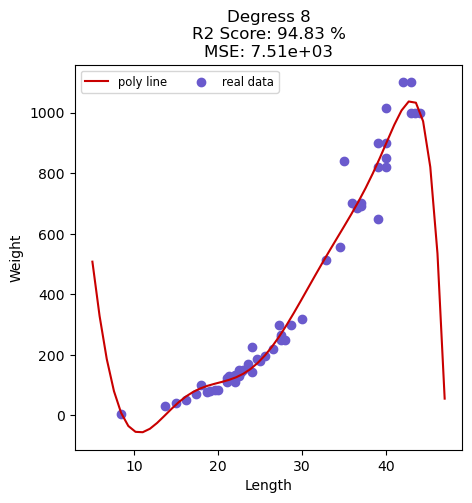

Degree 10 coef_: 0.03
Degree 10 MSE: 402987231074.5513

mae: 13.832455843617845
mse: 504.7281014781983
rmse: 22.466154577012023
R2 score: 0.9943413930361555



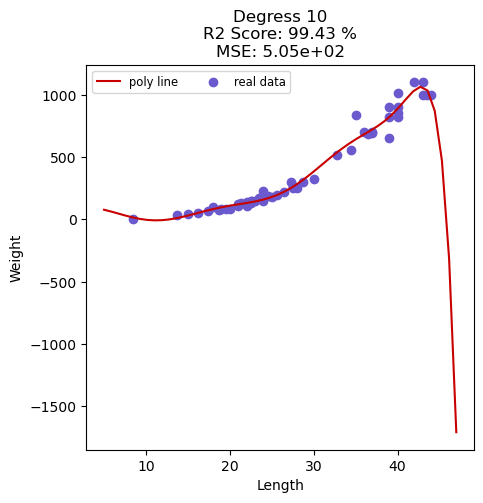

In [124]:
# 그러면... degree를 좀 많이 크게 해볼까?
# cross validation 도 5로 줄여봄
degrees = [x for x in range(2, 11, 2)]


for i in range(len(degrees)):
    # ax = plt.subplot(1, len(degrees), i + 1)
    # plt.setp(ax)
    plt.figure(figsize=(5,5))
    
    # poly instance
    poly = PolynomialFeatures(degree=degrees[i], include_bias=False)
    # model instane already
    pipeline = Pipeline([('polynomial_feature', poly), ('linear_regression', model)])
    pipeline.fit(np.array(perch_df['Length']).reshape(-1,1), perch_df['Weight'].tolist())
    
    feature = perch_df['Length'].to_list()
    label = perch_df['Weight']
    poly_feature = pipeline.named_steps['polynomial_feature'].transform(np.array(feature).reshape(-1,1))
        
    # train : test = 75 : 25
    X_train, X_test, y_train, y_test = train_test_split(poly_feature, label)
    
    # cross validation: k = 10
    scores = cross_val_score(pipeline, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
    gradient = pipeline.named_steps['linear_regression'].coef_
    
    print(f"Degree {degrees[i]} coef_: {gradient[i]:.2f}")
    print(f"Degree {degrees[i]} MSE: {-1*np.mean(scores)}")
    print()
    
    prediction = pipeline.named_steps['linear_regression'].predict(X_test)
    mae = mean_absolute_error(y_test, prediction)
    mse = mean_squared_error(y_test, prediction)
    rmse = mean_squared_error(y_test, prediction, squared=False)
    r_2 = r2_score(y_test, prediction)

    print(f"mae: {mae}")
    print(f"mse: {mse}")
    print(f"rmse: {rmse}")
    print(f"R2 score: {r_2}")
    print()
    
    # print(f"X_test: {X_test.shape}, {X_test.ndim}D")
    # prediction poly
    X_test = np.linspace(5, len(X_train)+5, 50)
    plt.plot(X_test, pipeline.predict(X_test[:,np.newaxis]), color='#C90000', label='poly line')
    plt.scatter(perch_df['Length'], perch_df['Weight'], color='#6A5ACD', label='real data')
    
    plt.title(f'Degress {degrees[i]}\nR2 Score: {r_2*100:.2f} %\nMSE: {mse:.2e}')
    plt.xlabel('Length')
    plt.ylabel('Weight')
    plt.legend(ncol=2, fontsize='small')
    
    plt.show()

- degree가 2이고 cv는 5일때가 가장 이상적임